# CNN Face Recognition

In [17]:
# Kelompok Rawon:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import random
import time
import imageio

from tensorflow import keras
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import jaccard_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from matplotlib.pyplot import imread
from glob import iglob
from PIL import Image
from skimage import color
from skimage import io
from os import listdir
from os.path import isdir, join
from ipykernel import kernelapp as app

In [18]:
target_list = [name for name in listdir('Foto/') if isdir(join('Foto/', name))]
print(target_list)

['AAA', 'ABI', 'AFI', 'AGH', 'AIL', 'ARL', 'ASA', 'BDL', 'DIA', 'DIO', 'DRA', 'EZA', 'FAF', 'FAR', 'FMR', 'FRS', 'GLA', 'GPS', 'HMA', 'HZR', 'IDR', 'KDA', 'MAA', 'MAJ', 'MFA', 'MFH', 'MGN', 'MMF', 'MRF', 'MSA', 'MZA', 'MZB', 'NIS', 'QTH', 'RCK', 'RKS', 'SHE', 'SNN', 'SVD', 'SYH', 'SYN', 'YSS', 'ZHT']


In [19]:
x = []
y = []
for index, target in enumerate(target_list):
    for Foto in iglob('Foto/' + target + '/*.png'):
        img = cv2.imread(Foto)
        x.append(np.array(img))
        y.append(index)

for index, target in enumerate(target_list):
    for Foto in iglob('Foto/' + target + '/*.png'):
        img = cv2.imread(Foto)
        x.append(np.array(img))
        y.append(index)

x = np.array(x,dtype='float32')
y = np.array(y,dtype='float64')

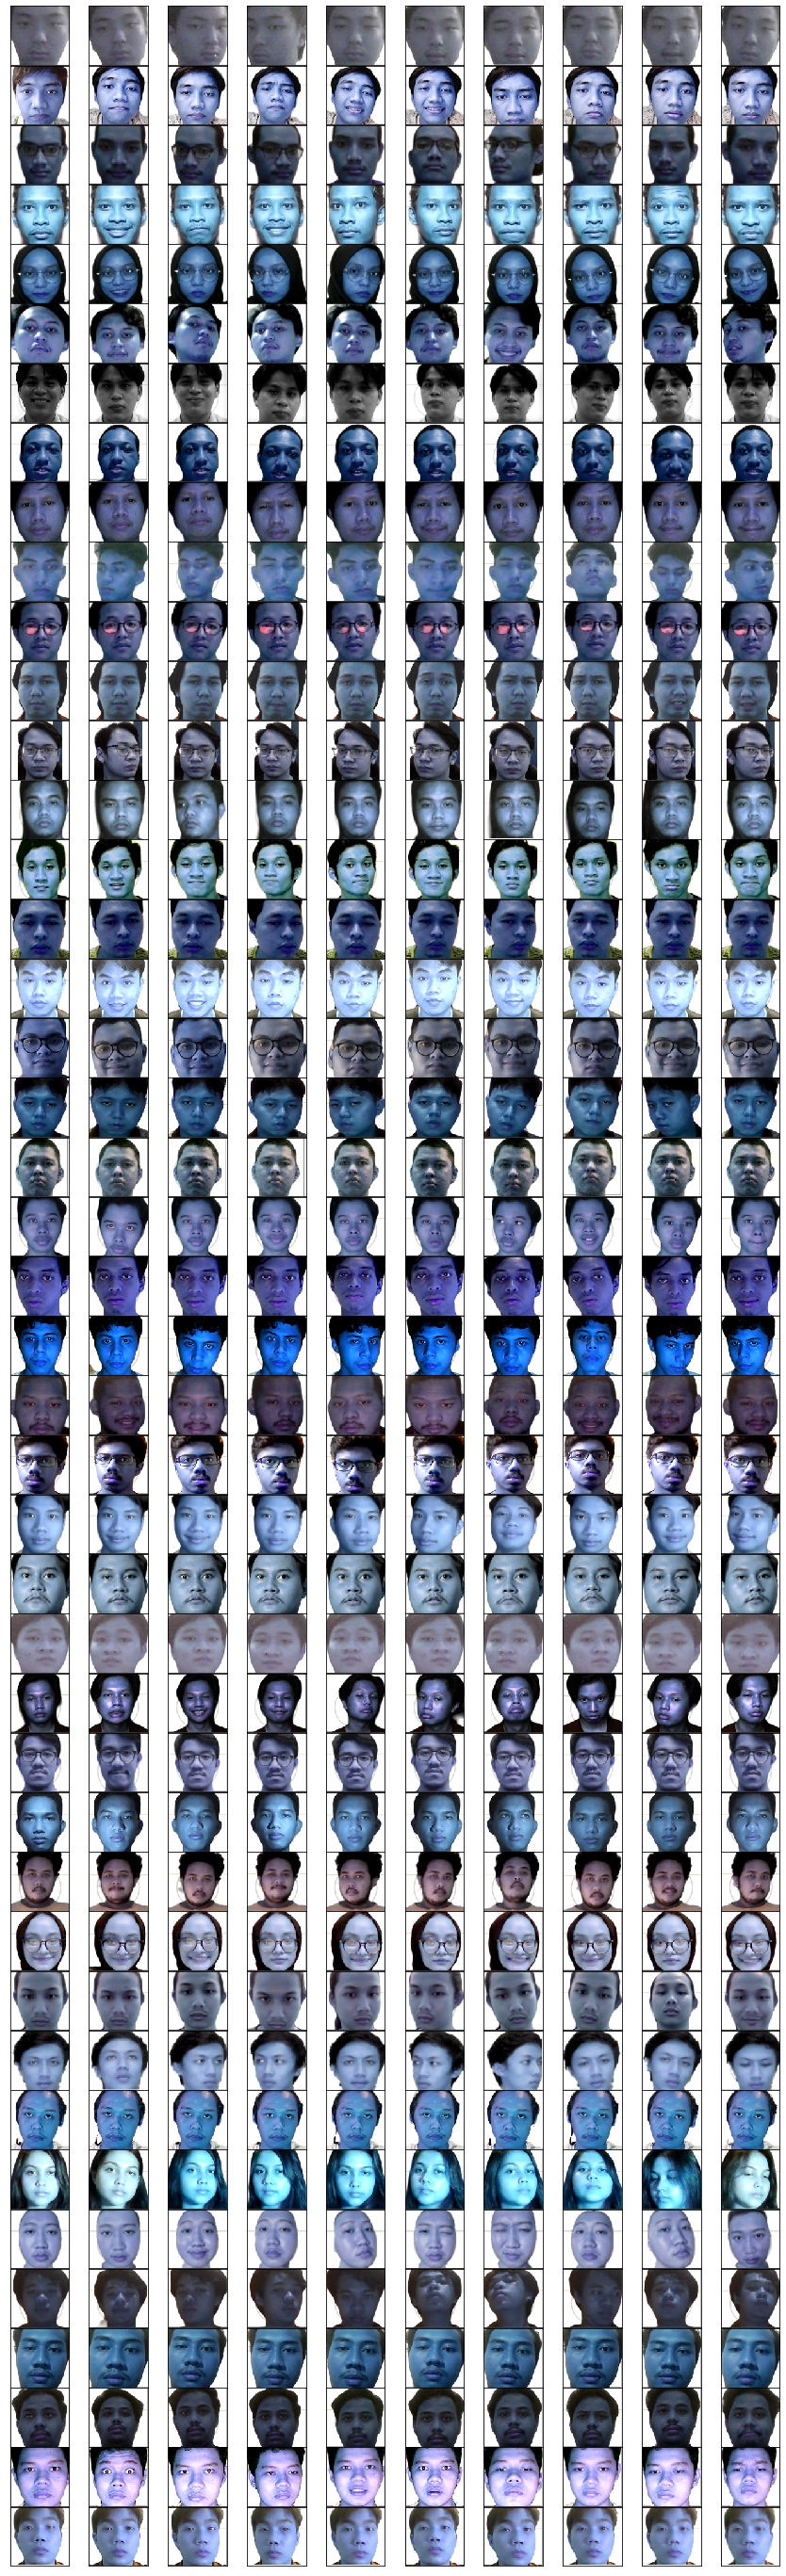

In [20]:
fig, axes = plt.subplots(43, 10,figsize=(15, 50), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(x[i]/np.amax(x[i]))

In [21]:
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(x, y)

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

y_train = keras.utils.to_categorical(y_train, 43)
print(x_train.shape)
print(x_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(602, 100, 100, 3)
(258, 100, 100, 3)
(array([0., 1.], dtype=float32), array([25284,   602], dtype=int64))
(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42.]), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype=int64))


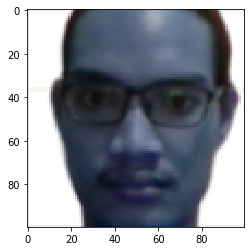

In [22]:
example = x_train[20]
plt.imshow(example/np.amax(example))

In [50]:
model = keras.Sequential() 
model.add(keras.layers.Conv2D(64, (2, 2), input_shape=(100, 100, 3))) 
model.add(keras.layers.Activation('relu')) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) 

model.add(keras.layers.Conv2D(64, (2, 2))) 
model.add(keras.layers.Activation('relu')) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) 

model.add(keras.layers.Conv2D(128, (2, 2))) 
model.add(keras.layers.Activation('relu')) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) 

model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128)) 
model.add(keras.layers.Activation('relu')) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(43)) 
model.add(keras.layers.Activation('softmax')) 

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 99, 99, 64)        832       
_________________________________________________________________
activation_25 (Activation)   (None, 99, 99, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 64)        16448     
_________________________________________________________________
activation_26 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 23, 23, 128)      

In [52]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=["accuracy"])

callback_acc = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', min_delta=0.01, patience=3, verbose=0, mode='max',
    baseline=None, restore_best_weights=True
)

start = time.time()
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=25,
    batch_size=4,
    callbacks=[callback_acc]
)
runtime = time.time() - start
print('Runtime : ', runtime, 's')

Epoch 1/25
151/151 [==============================] - 14s 89ms/step - loss: 9.1194 - accuracy: 0.0216
Epoch 2/25
151/151 [==============================] - 13s 89ms/step - loss: 3.6933 - accuracy: 0.03990s - loss: 3.6925 - accu
Epoch 3/25
151/151 [==============================] - 14s 90ms/step - loss: 2.8556 - accuracy: 0.2857
Epoch 4/25
151/151 [==============================] - 14s 95ms/step - loss: 1.7866 - accuracy: 0.5349
Epoch 5/25
151/151 [==============================] - 14s 91ms/step - loss: 1.3721 - accuracy: 0.66781s -
Epoch 6/25
151/151 [==============================] - 13s 89ms/step - loss: 0.8699 - accuracy: 0.7708
Epoch 7/25
151/151 [==============================] - 14s 89ms/step - loss: 0.5537 - accuracy: 0.83550s - loss: 0.5614 - accu
Epoch 8/25
151/151 [==============================] - 14s 90ms/step - loss: 0.4042 - accuracy: 0.8821
Epoch 9/25
151/151 [==============================] - 14s 90ms/step - loss: 0.4726 - accuracy: 0.8904
Epoch 10/25
151/151 [=========

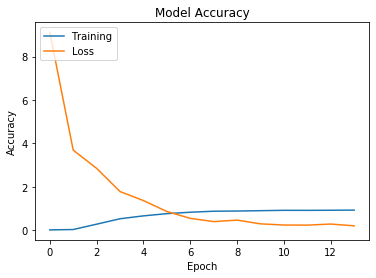

In [53]:
# Plot results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Loss'], loc='upper left')


In [54]:
start = time.time()
round_pred = model.predict_classes(x_test)
#round_pred = (model.predict(x_test) > 0.5).astype("int32")
#round_pred = np.argmax(model.predict(x_test), axis=-1)
predict_time = time.time() - start
print('Predict Time : ', predict_time, 's')

Predict Time :  1.2322940826416016 s


In [55]:
print(round_pred)
print(y_test)

[ 0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3
  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15
 16 16 16 16 16 16 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19 19
 20 20 20 20 20 20 21 21 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23
 24 24 24 24 24 24 25 25 25 25 25 25 26 26 26 26 26 26 27 27 27 27 27 27
 28 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30 30 30 31 31 31 31 31 31
 32 32 32 32 32 32 33 33 33 33 33 33 34 34 34 34 34 34 35 35 35 35 35 35
 36 36 36 36 36 36 37 37 37 37 37 37 38 38 38 38 38 38 39 39 39 39 39 39
 40 40 40 40 40 40 41 41 41 41 41 41 42 42 42 42 42 42]
[ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.
  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.
  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.

In [56]:
print(classification_report(y_test, round_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00         6
         3.0       1.00      1.00      1.00         6
         4.0       1.00      1.00      1.00         6
         5.0       1.00      1.00      1.00         6
         6.0       1.00      1.00      1.00         6
         7.0       1.00      1.00      1.00         6
         8.0       1.00      1.00      1.00         6
         9.0       1.00      1.00      1.00         6
        10.0       1.00      1.00      1.00         6
        11.0       1.00      1.00      1.00         6
        12.0       1.00      1.00      1.00         6
        13.0       1.00      1.00      1.00         6
        14.0       1.00      1.00      1.00         6
        15.0       1.00      1.00      1.00         6
        16.0       1.00      1.00      1.00         6
        17.0       1.00    

In [57]:
all_pred = model.predict(x_test)
all_pred_val = np.argmax(all_pred, axis=1)

In [58]:
isTrue = 0
for value in range(len(all_pred_val)):
    if(all_pred_val[value] == y_test[value]):
        isTrue = isTrue + 1
    else:
        print("at : " + str(value) + " False with prediction : " + str(all_pred_val[value]) + " which is : " + str(y_test[value]))
        image = x_test[value]
        image = np.array(image, dtype = 'float32')
        pixels = image.reshape((100, 100, 3))
        #plt.imshow(pixels/np.amax(pixels))
        #plt.show()

In [59]:
print("Accuracy of Prediction : " + str(isTrue/len(y_test)*100) + "%")

Accuracy of Prediction : 100.0%
